In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()





In [155]:
data = pd.read_csv('tips.csv')

data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [96]:
data.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [28]:
# %matplotlib qt5

In [2]:
data.total_bill.max()

50.81

In [3]:
%matplotlib inline

In [29]:
data.plot()

<AxesSubplot:>

<AxesSubplot:ylabel='Frequency'>

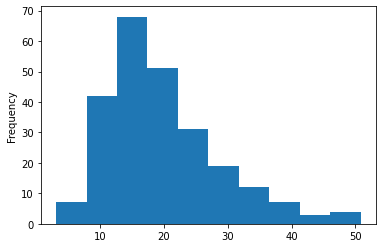

In [5]:
data.total_bill.plot(kind='hist')

In [6]:
data.sample(5)

,total_bill,tip,sex,smoker,day,time,size
162,16.21,2.00,Female,No,Sun,Dinner,3
153,24.55,2.00,Male,No,Sun,Dinner,4
65,20.08,3.15,Male,No,Sat,Dinner,3
45,18.29,3.00,Male,No,Sun,Dinner,2
144,16.43,2.30,Female,No,Thur,Lunch,2


<AxesSubplot:title={'center':'Кол-во посетителей по дням'}>

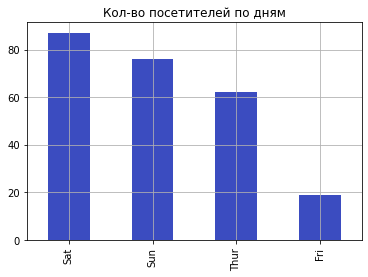

In [7]:
data['day'].value_counts().plot(kind='bar', grid='True', colormap ='coolwarm', title="Кол-во посетителей по дням")

array([<AxesSubplot:title={'center':'Сумма чека'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Чаевые'}, ylabel='Frequency'>],
      dtype=object)

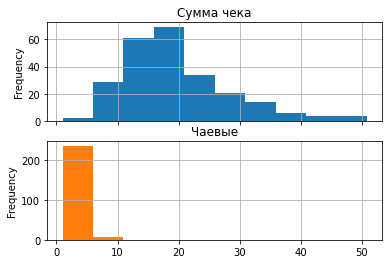

In [8]:
data[['total_bill','tip']].plot(kind='hist', subplots= True, title=['Сумма чека','Чаевые'],legend= False, grid=True)

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

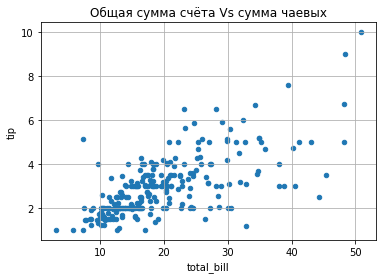

In [9]:
data.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

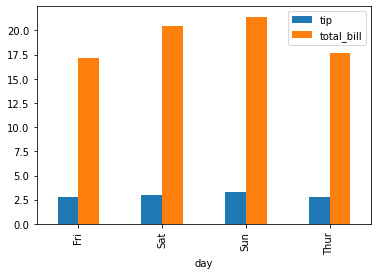

In [10]:
data.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind='bar')

<AxesSubplot:xlabel='sex,smoker'>

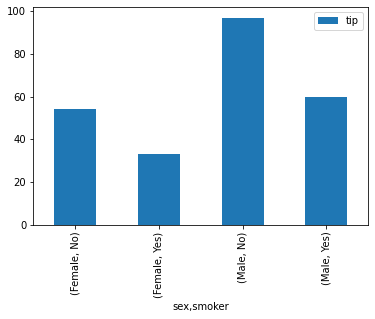

In [11]:
data.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind='bar')

среднюю сумму чаевых, которые оставляют курящие и некурящие посетители

In [12]:
data.pivot_table(values='tip',index='smoker',aggfunc='mean')

,tip
smoker,
No,2.991854
Yes,3.008710


In [13]:
data.groupby('smoker')['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

Создание графиков с matplotlib

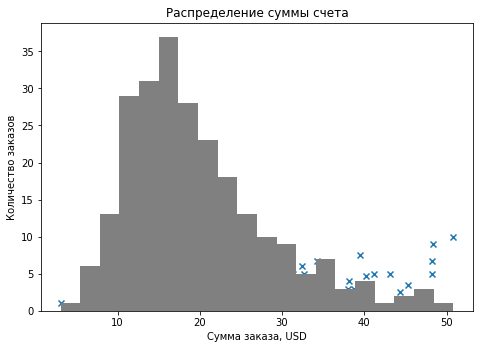

In [14]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.hist(data['total_bill'],bins = 20, color = 'gray')
axes.set_title('Распределение суммы счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')
axes.scatter(x = data.total_bill, y = data.tip, marker = 'x')

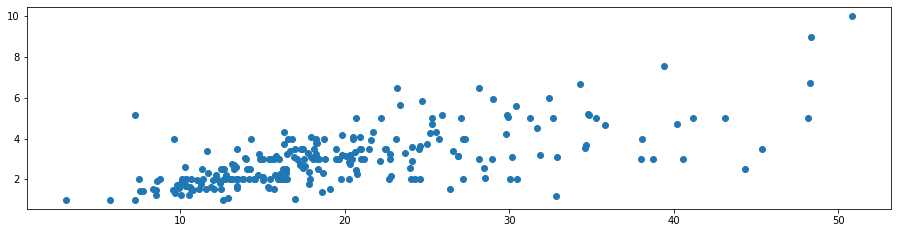

In [15]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,0.7])
axes.scatter(x = data.total_bill, y = data.tip, marker = 'o')

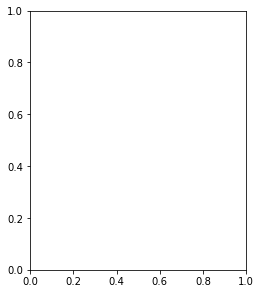

In [16]:
fig2 = plt.figure()
axes = fig2.add_axes([0.2, 0.2, 0.5, 0.9])

 основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

In [17]:
max_by_day = data.groupby(by='day').total_bill.max()
min_by_day = data.groupby(by='day').total_bill.min()

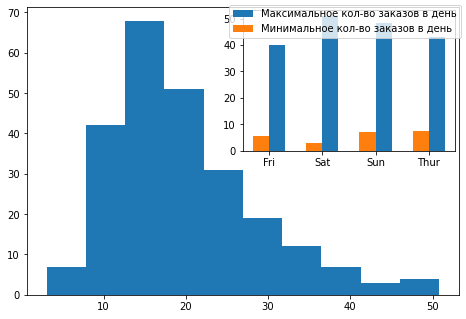

In [18]:
fig3 = plt.figure()
fig3_axes = fig3.add_axes([0,0,1,1])
fig3_axes.hist(data.total_bill)
fig3_small_axes = fig3.add_axes([0.5,0.5,0.49,0.49])
fig3_small_axes.bar(x = max_by_day.index, height = max_by_day.values, width = 0.3, align = 'edge', label='Максимальное кол-во заказов в день')
fig3_small_axes.bar(x = min_by_day.index, height = min_by_day.values, width = -0.3, align = 'edge', label='Минимальное кол-во заказов в день')
fig3.legend(loc = 1)

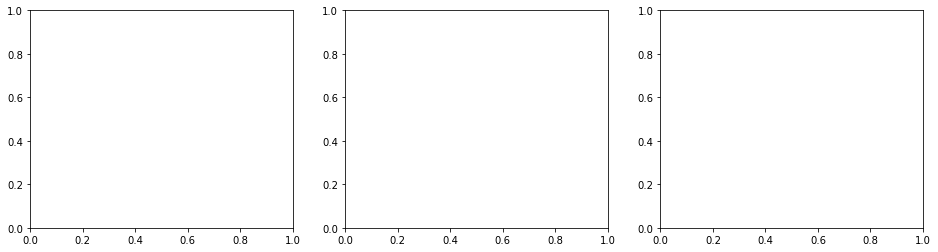

In [19]:
fig, axes = plt.subplots(1,3, figsize=(16,4))

In [20]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3


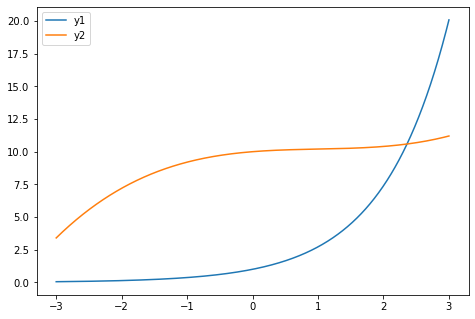

In [26]:
fig_exp = plt.figure()
fig_exp_axes = fig_exp.add_axes([0,0,1,1])
fig_exp_axes.plot(x,y1,label='y1')
fig_exp_axes.plot(x,y2,label='y2')
fig_exp_axes.legend()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

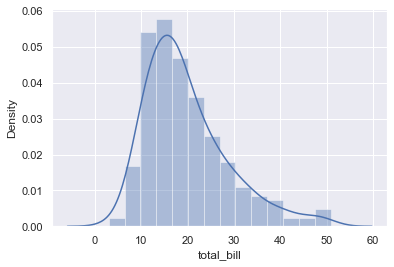

In [35]:
sns.set()
sns.distplot(data['total_bill'])

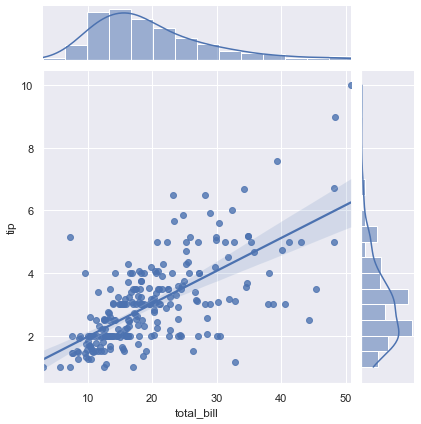

In [48]:
sns.jointplot(x = 'total_bill', y = 'tip', data = data, kind = 'reg')

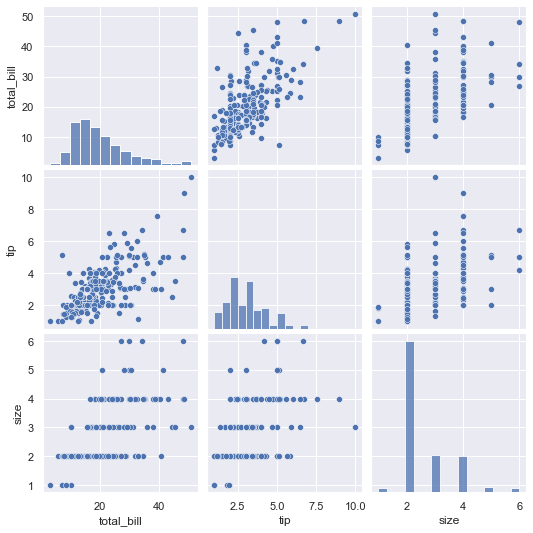

In [43]:
sns.pairplot(data)

day
Sat    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_bill, dtype: object

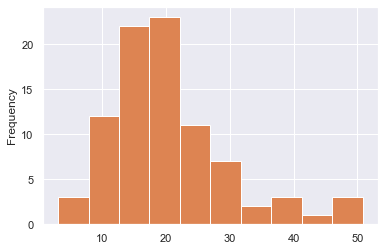

In [89]:
data[data.day == 'Fri'].groupby(by='day').total_bill.plot(kind='hist')

day
Sun    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_bill, dtype: object

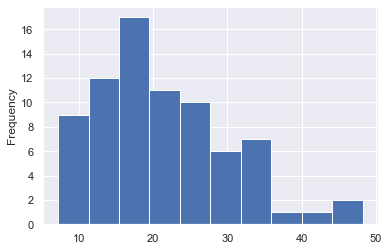

In [91]:
data[data.day == 'Sun'].groupby(by='day').total_bill.plot(kind='hist')

<AxesSubplot:>

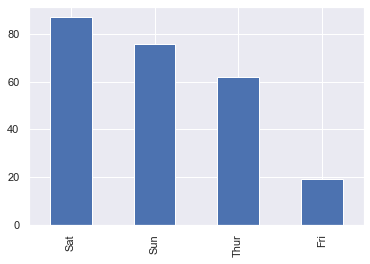

In [75]:
data['day'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='day', ylabel='count'>

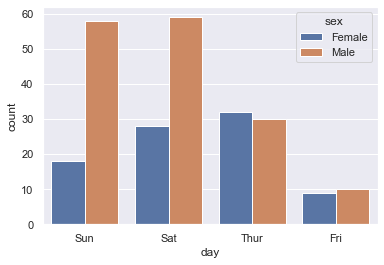

In [114]:
sns.countplot(x='day', data = data, hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

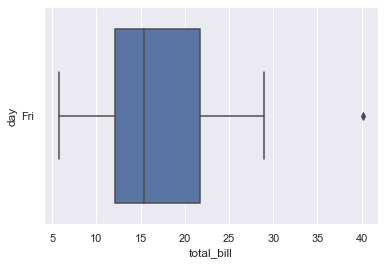

In [146]:
sns.boxplot(y='day',x='total_bill', data=data[data.day=='Fri'])

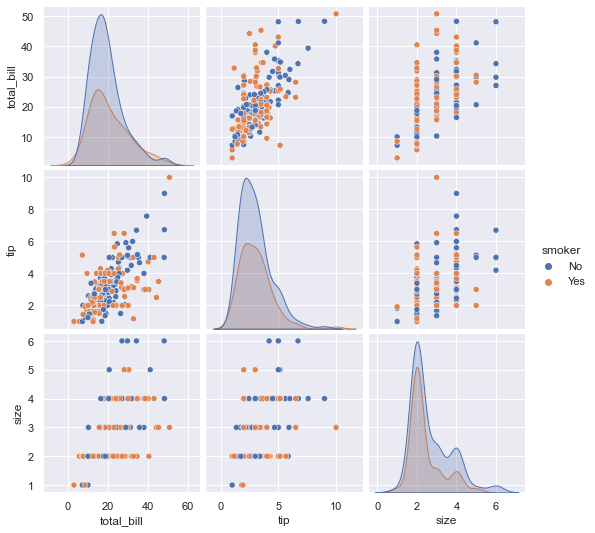

In [109]:
sns.pairplot(data, hue = 'smoker')

In [147]:
print(data[data.day=='Fri'].copy().total_bill.sort_values())

92      5.75
222     8.58
226    10.09
100    11.35
97     12.03
220    12.16
99     12.46
221    13.42
224    13.42
101    15.38
223    15.98
225    16.27
93     16.32
98     21.01
91     22.49
94     22.75
96     27.28
90     28.97
95     40.17
Name: total_bill, dtype: float64


In [149]:
data[data.day=='Fri'].describe()

,total_bill,tip,size
count,19.000000,19.000000,19.000000
mean,17.151579,2.734737,2.105263
std,8.302660,1.019577,0.567131
min,5.750000,1.000000,1.000000
25%,12.095000,1.960000,2.000000
50%,15.380000,3.000000,2.000000
75%,21.750000,3.365000,2.000000
max,40.170000,4.730000,4.000000


<AxesSubplot:>

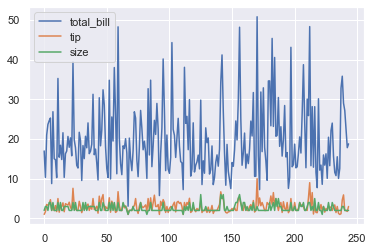

In [156]:
data.plot()

In [186]:
data.iplot(kind='bubble', x='total_bill', y='size', size='tip', xTitle='Total Bill', yTitle='Size')

In [192]:
data[['total_bill','tip']].iplot(kind='scatter')